# MingoBot

CONVERSATIONAL AI CHAT BOT ON FAQ IN MORINGA SCHOOL



<img src="./images/newMingo.jpeg">

# Group 6 Capstone Project Team
Student names:
 1. Peggy Obam
 2. Sheila Machaha
 3. Edward Opollo
 4. Jackson Maina
 5. Kithinji Murungi
 6. Purity Riungu
 7. Ivy Kemunto
 

Student pace: part time

Technical Mentors:
1. William Okomba
2. Noah Kandie


# Moringa School
Data Science Core: Cohort DSF-PT03


# Business Understanding

1.1 Overview

The project highlights the importance of prompt customer feedback for the success of Moringa School, an educational institution. To improve customer service, the school aims to establish a convenient and interactive system for addressing financing and course-related inquiries round-the-clock. This will reduce the workload on staff, allowing them to focus on more strategic tasks. The school recognizes that responsive customer service is crucial for building positive relationships with students and potential students. They plan to use technology and automation to provide quick and accurate responses to inquiries, improving convenience and accessibility while enabling staff to concentrate on value-added activities like quality enhancement, innovative teaching methods, and personalized support for students in need.

# Problem Statement

Prospective students often struggle to find specific answers to their questions on Moringa School's website, leading to frustration and an influx of repetitive email inquiries. To address this issue, implementing a machine learning chatbot is a promising solution. This chatbot would provide a seamless and interactive platform for prospective students, making it easy for them to access the information they need.

# Objective

#  General Objective
To create an intelligent chatbot tailored to efficiently address inquiries related to Data science  details on the Moringa school website, with a primary focus on prospective students seeking admission.


# Specific  Objectives


To implement a two-layered chatbot system

1. To develop a chatbot that answers any data science related questions for prospective student wishing to join Moringa 
2. To smoothen good customer service experince where student can get information related to data science course in general and achieve 80% accuracy in the bot
3.  Establish a feedback mechanism that allows users to provide feedback on the chatbot's performance. Regularly analyze this feedback to identify areas of improvement and adjust the chatbot's responses accordingly. Continuously enhance the chatbot's accuracy, responsiveness, and user-friendliness to ensure an ongoing positive user experience.

# Data Exploration

## Webscraping Data Science courses from Moringa Website

In [ ]:
#import relevant libraries
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import string

In [ ]:
#lets now webscrap from moringa website and get the courses we  need and or this we need the data for data science course
import requests
from bs4 import BeautifulSoup

def fetch_additional_course_details(course_link):
    try:
        # Send an HTTP GET request to the course link
        response = requests.get(course_link)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the HTML content of the course page
            soup = BeautifulSoup(response.content, 'html.parser')

            # Extract additional information from the course page as needed
            additional_details = {}

            # Find the main tag with class 'text-primary'
            main_elem = soup.find('main', class_='text-primary')

            if main_elem:
                # Find all sections inside the main tag
                sections = main_elem.find_all('section')

                seclen = len(sections)

                print("The course has sections : " + str(seclen) + " : " + course_link)

                if seclen < 13:
                    return None, False

                # Check if there are at least four sections
                # Get the fourth section and retrieve its chunk
                fourth_section = sections[3]
                # additional_details['FAQs'] = fourth_section.text.strip()
                additional_details['FAQs'] = fourth_section.text.strip()

                # Check if there are at least six sections
                # Get the sixth section and retrieve its chunk
                sixth_section = sections[5]
                # additional_details['course_details'] = sixth_section.text.strip()
                additional_details['course_details'] = sixth_section.text.strip()

                 # Check if there are at least six sections
                # Get the sixth section and retrieve its chunk
                seventh_section = sections[6]
                # additional_details['prerequisites'] = seventh_section.text.strip()
                additional_details['prerequisites'] = seventh_section.text.strip()

                # Check if there are at least six sections
                # Get the sixth section and retrieve its chunk
                eith_section = sections[8]
                # additional_details['modules'] = eith_section.text.strip()
                # additional_details['modules'] = eith_section.text.strip()

                # Check if there are at least six sections
                # Get the sixth section and retrieve its chunk
                ninth_section = sections[8]
                # additional_details['opportunities'] = ninth_section.text.strip()
                # additional_details['opportunities'] = ninth_section.text.strip()

            # Add more fields as needed

            return additional_details, True
        else:
            print(f"Failed to fetch additional details for course: {course_link}")
            return None, False
    except Exception as e:
        print(f"An error occurred while fetching additional course details: {str(e)}")
        return None, False

def extract_courses_info(html_chunk):
    # Parse the HTML chunk
    soup = BeautifulSoup(html_chunk, 'html.parser')

    # Find all <div> elements with class 'block' inside the HTML chunk
    course_divs = soup.find_all('div', class_='block')

    course_info_list = []  # Initialize an empty list to store course information

    for course_div in course_divs:
        # Extract course title and description
        title_elem = course_div.find('h1', class_='text-secondary')
        description_elem = course_div.find('div', class_='leading-relaxed')
        link_elem = course_div.find('a', href=True)

        if title_elem and description_elem:
            title = title_elem.text.strip()
            description = description_elem.text.strip()
            link = link_elem['href']

            # call the function and pass the link here
            some_more_data, successfactor = fetch_additional_course_details(link)

            if not successfactor:
                print(f"{title} has too little information.")
                continue

            # Create a dictionary to store the course details
            course_info = {
                'Title': title,
                'Description': description,
                'Link': link,
                'Details': some_more_data
            }

            course_info_list.append(course_info)

    return course_info_list

def scrape_courses(url):
    try:
        page = requests.get(url)
        soup = BeautifulSoup(page.text, 'html.parser')

        # Assuming the courses are inside one of the sections,
        # we'll pass the entire page's HTML to extract_courses_info.
        list_of_courses = extract_courses_info(soup.prettify())

        return list_of_courses
    except Exception as e:
        print(f"An error occurred while scraping courses: {str(e)}")
        return []
# URL for page 1
url1 = 'https://moringaschool.com/courses/'
list_of_courses_page1 = scrape_courses(url1)

# URL for page 2
url2 = 'https://moringaschool.com/courses/page/2/'
list_of_courses_page2 = scrape_courses(url2)

# Combine the results if needed
all_courses = list_of_courses_page1 + list_of_courses_page2

# Print the courses
for i, course in enumerate(all_courses):
    print(i + 1, course)


The course has sections : 12 : https://moringaschool.com/courses/high-school-holiday-tech-bootcamp/
High School Holiday Tech Bootcamp has too little information.
The course has sections : 13 : https://moringaschool.com/courses/software-engineering-mobile/
The course has sections : 13 : https://moringaschool.com/courses/data-science-full-time-hybrid/
The course has sections : 13 : https://moringaschool.com/courses/cybersecurity-comptia-security-course/
The course has sections : 13 : https://moringaschool.com/courses/product-design-ux-ui-part-time-course/
The course has sections : 12 : https://moringaschool.com/courses/cybersecurity-prep/
Cybersecurity Prep has too little information.
The course has sections : 10 : https://moringaschool.com/courses/data-visualization-with-python/
Data Visualization with Python has too little information.
The course has sections : 13 : https://moringaschool.com/courses/devops-engineering/
The course has sections : 13 : https://moringaschool.com/courses/pr

In [ ]:
#lets now get the data science full time hybrid 
DSFT = all_courses[1]
DSFT

{'Title': 'Data Science Full-time Hybrid',
 'Description': 'Are you passionate about data? Do you want to learn how to analyze data, and provide data-driven insights for decisions? This is the course for you. Kickstart the journey to your future career now!',
 'Link': 'https://moringaschool.com/courses/data-science-full-time-hybrid/',
 'Details': {'FAQs': 'Learn Python for Data Science, Data Analysis, Data Visualization, Data Modelling & Machine Learning in 25 weeks\n\n\nThe credits are rolling on a movie you’ve just concluded watching and Netflix automatically queues the preview for another movie that you might like; You’re doing some online shopping on Jumia and while scrolling down the product description, you notice a section that says “Most popular” that has the same product from different vendors at different prices; this is Data Science at work and businesses are always looking for talented individuals to help them analyze and draw actionable insights from their data in order to

In [ ]:
#lets now get the data science part-time
DSPT = all_courses[7]
DSPT

{'Title': 'Data Science Part-time',
 'Description': 'This is for individuals with a demanding schedule. Learn how to explore, analyze, visualize, build models with data using programming languages, such as Python and R, and deploy models into applications',
 'Link': 'https://moringaschool.com/courses/data-science-course-part-time/',
 'Details': {'FAQs': 'Have a demanding schedule? Explore our part-time option\n\n\nLearn Python for Data Science, Data Analysis, Data Visualization, Data Modelling & Machine Learning in 35 weeks\nThe credits are rolling on a movie you’ve just concluded watching and Netflix automatically queues the preview for another movie that you might like; You’re doing some online shopping on Jumia and while scrolling down the product description, you notice a section that says “Most popular” that has the same product from different vendors at different prices; this is Data Science at work and businesses are always looking for talented individuals to help them analyze a

In [ ]:
#lets now get data science full time online course data from the scrapped data
DSFTO = all_courses[8]
DSFTO

{'Title': 'Data Science Full-time Online',
 'Description': 'Are you passionate about data? Do you want to learn how to analyze data, and provide data-driven insights for decisions? This is the course for you. Kickstart the journey to your future career now!',
 'Link': 'https://moringaschool.com/courses/data-science-course/',
 'Details': {'FAQs': 'Learn Python for Data Science, Data Analysis, Data Visualization, Data Modelling & Machine Learning in 25 weeks\n\n\nThe credits are rolling on a movie you’ve just concluded watching and Netflix automatically queues the preview for another movie that you might like; You’re doing some online shopping on Jumia and while scrolling down the product description, you notice a section that says “Most popular” that has the same product from different vendors at different prices; this is Data Science at work and businesses are always looking for talented individuals to help them analyze and draw actionable insights from their data in order to make info

In [ ]:
#lets now all the data related to data science full time and hybrid
data_science = [all_courses[1], all_courses[7], all_courses[8]]

for file in data_science:
    print(file)


{'Title': 'Data Science Full-time Hybrid', 'Description': 'Are you passionate about data? Do you want to learn how to analyze data, and provide data-driven insights for decisions? This is the course for you. Kickstart the journey to your future career now!', 'Link': 'https://moringaschool.com/courses/data-science-full-time-hybrid/', 'Details': {'FAQs': 'Learn Python for Data Science, Data Analysis, Data Visualization, Data Modelling & Machine Learning in 25 weeks\n\n\nThe credits are rolling on a movie you’ve just concluded watching and Netflix automatically queues the preview for another movie that you might like; You’re doing some online shopping on Jumia and while scrolling down the product description, you notice a section that says “Most popular” that has the same product from different vendors at different prices; this is Data Science at work and businesses are always looking for talented individuals to help them analyze and draw actionable insights from their data in order to ma

In [ ]:
#lets now get data science full time hybrid data
data_science

[{'Title': 'Data Science Full-time Hybrid',
  'Description': 'Are you passionate about data? Do you want to learn how to analyze data, and provide data-driven insights for decisions? This is the course for you. Kickstart the journey to your future career now!',
  'Link': 'https://moringaschool.com/courses/data-science-full-time-hybrid/',
  'Details': {'FAQs': 'Learn Python for Data Science, Data Analysis, Data Visualization, Data Modelling & Machine Learning in 25 weeks\n\n\nThe credits are rolling on a movie you’ve just concluded watching and Netflix automatically queues the preview for another movie that you might like; You’re doing some online shopping on Jumia and while scrolling down the product description, you notice a section that says “Most popular” that has the same product from different vendors at different prices; this is Data Science at work and businesses are always looking for talented individuals to help them analyze and draw actionable insights from their data in orde

## Preprocessing the scraped data

In [ ]:
df = pd.DataFrame(data_science)

In [ ]:
# Extract details into separate columns
df['FAQs'] = df['Details'].apply(lambda x: x.get('FAQs', ''))
df['course_details'] = df['Details'].apply(lambda x: x.get('course_details', ''))
df['prerequisites'] = df['Details'].apply(lambda x: x.get('prerequisites', ''))

# Drop the original 'Details' column
df = df.drop(columns=['Details'])

df

,Title,Description,Link,FAQs,course_details,prerequisites
0,Data Science Full-time Hybrid,Are you passionate about data? Do you want to ...,https://moringaschool.com/courses/data-science...,"Learn Python for Data Science, Data Analysis, ...",Course Details\n\n\nSee below the pacing optio...,Course Prerequisites\n\n\n\nTo become a data s...
1,Data Science Part-time,This is for individuals with a demanding sched...,https://moringaschool.com/courses/data-science...,Have a demanding schedule? Explore our part-ti...,Course Details\n\n\nFind out the pacing option...,Course Prerequisites\n\n\n\nTo become a data s...
2,Data Science Full-time Online,Are you passionate about data? Do you want to ...,https://moringaschool.com/courses/data-science...,"Learn Python for Data Science, Data Analysis, ...",Course Details\n\n\nFind out the pacing option...,Course Prerequisites\n\n\n\nTo become a data s...


In [ ]:
import re

# Normalize text
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply normalization to text columns
df['Title'] = df['Title'].apply(normalize_text)
df['Description'] = df['Description'].apply(normalize_text)
df['FAQs'] = df['FAQs'].apply(normalize_text)
df['course_details'] = df['course_details'].apply(normalize_text)
df['prerequisites'] = df['prerequisites'].apply(normalize_text)

df

,Title,Description,Link,FAQs,course_details,prerequisites
0,data science fulltime hybrid,are you passionate about data do you want to l...,https://moringaschool.com/courses/data-science...,learn python for data science data analysis da...,course details\n\n\nsee below the pacing optio...,course prerequisites\n\n\n\nto become a data s...
1,data science parttime,this is for individuals with a demanding sched...,https://moringaschool.com/courses/data-science...,have a demanding schedule explore our parttime...,course details\n\n\nfind out the pacing option...,course prerequisites\n\n\n\nto become a data s...
2,data science fulltime online,are you passionate about data do you want to l...,https://moringaschool.com/courses/data-science...,learn python for data science data analysis da...,course details\n\n\nfind out the pacing option...,course prerequisites\n\n\n\nto become a data s...


In [ ]:
# Replace newline characters with spaces
df = df.replace('\n', ' ', regex=True)

df

,Title,Description,Link,FAQs,course_details,prerequisites
0,data science fulltime hybrid,are you passionate about data do you want to l...,https://moringaschool.com/courses/data-science...,learn python for data science data analysis da...,course details see below the pacing options ...,course prerequisites to become a data scien...
1,data science parttime,this is for individuals with a demanding sched...,https://moringaschool.com/courses/data-science...,have a demanding schedule explore our parttime...,course details find out the pacing options a...,course prerequisites to become a data scien...
2,data science fulltime online,are you passionate about data do you want to l...,https://moringaschool.com/courses/data-science...,learn python for data science data analysis da...,course details find out the pacing options a...,course prerequisites to become a data scien...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading the stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

# Set of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and tokenize
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing to text columns
df['Title'] = df['Title'].apply(preprocess_text)
df['Description'] = df['Description'].apply(preprocess_text)
df['FAQs'] = df['FAQs'].apply(preprocess_text)
df['course_details'] = df['course_details'].apply(preprocess_text)
df['prerequisites'] = df['prerequisites'].apply(preprocess_text)

df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Title,Description,Link,FAQs,course_details,prerequisites
0,data science fulltime hybrid,passionate data want learn analyze data provid...,https://moringaschool.com/courses/data-science...,learn python data science data analysis data v...,course details see pacing options available pr...,course prerequisites become data scientist nee...
1,data science parttime,individuals demanding schedule learn explore a...,https://moringaschool.com/courses/data-science...,demanding schedule explore parttime option lea...,course details find pacing options available p...,course prerequisites become data scientist nee...
2,data science fulltime online,passionate data want learn analyze data provid...,https://moringaschool.com/courses/data-science...,learn python data science data analysis data v...,course details find pacing options available p...,course prerequisites become data scientist nee...


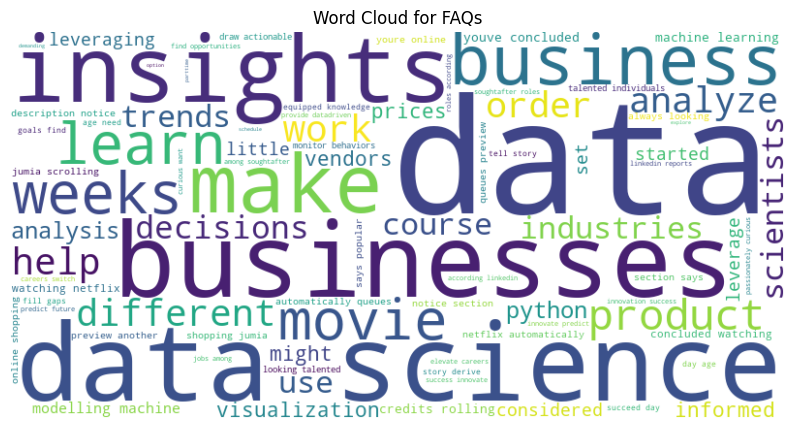

In [ ]:
# Let us visualize the FAQ column and get a glimpse of what is mainly talked about

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud for FAQs column
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(' '.join(df['FAQs']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for FAQs")
plt.show()


### WORD EMBEDDING

In [ ]:
from gensim.models import Word2Vec

# Concatenate text from multiple columns for each course
combined_text = df['Description'] + ' ' + df['FAQs'] + ' ' + df['course_details'] + ' ' + df['prerequisites']

# Tokenize the combined text (split into words)
tokenized_text = [text.split() for text in combined_text]

# Build the Word2Vec model
word2vec_model = Word2Vec(vector_size=200, sg=0, window=5, min_count=1)
word2vec_model.build_vocab(tokenized_text)

# sample
tokenized_text[0][:10]

['passionate',
 'data',
 'want',
 'learn',
 'analyze',
 'data',
 'provide',
 'datadriven',
 'insights',
 'decisions']

<img src="./images/0_6VT155ktO4lSkWXD.png">

# MODELING
Word2Vec is a popular technique for creating word embeddings or vector representations of words based on their context within a given corpus. These vectors can be used for various natural language processing tasks.

In [ ]:
# Train the Word2Vec model on the tokenized text and this will entail changing word text into vectors that is easy for machine learning
word2vec_model.train(tokenized_text, total_examples=word2vec_model.corpus_count, epochs=10)

(6029, 9070)

In [ ]:
# Verify the training by checking the word vector for a sample word, e.g., "data" 
word_vector_for_data = word2vec_model.wv['data']

word_vector_for_data[:10]

array([ 0.00826168, -0.00010051, -0.00484181,  0.0342495 ,  0.02759451,
       -0.03232658,  0.01058601,  0.04994084, -0.00896632,  0.01534384],
      dtype=float32)


The code above shows us the numbers that represent the word "data" in a special way. It helps us understand how the model has learned to show what "data" means based on how it's used in the training data. These numbers are like codes that tell us the meaning of words and can be used for different tasks in understanding and processing language

In [ ]:
# Save the word vectors to a text file
word2vec_model.wv.save_word2vec_format("Word2Vec_ds.txt")

# Confirm that the file has been saved
import os
"Word2Vec_ds.txt saved successfully!" if os.path.exists("Word2Vec_ds.txt") else "Error in saving file."


'Word2Vec_ds.txt saved successfully!'

In [ ]:
# Compress the saved Word2Vec model
with gzip.open("Word2Vec_ds_compressed.txt.gz", 'wb') as f:
    with open("Word2Vec_ds.txt", 'rb') as fp:
        data = fp.read()
    f.write(data)

# Confirm that the compressed file has been saved
"Word2Vec_ds_compressed.txt.gz saved successfully!" if os.path.exists("Word2Vec_ds_compressed.txt.gz") else "Error in saving compressed file."

'Word2Vec_ds_compressed.txt.gz saved successfully!'

In [26]:
# Compress the saved Word2Vec model
import gzip
fp = open("Word2Vec_ds.txt", 'rb')
data = fp.read()

bindata = bytearray(data)

with gzip.open("Word2Vec_ds.txt.gz", 'wb') as f:
    f.write(bindata)

# NEXT STEPS

The next step will be to add this model to our rasa for the chatbot which will empower it to provide more natural and contextually relevant responses, enhancing the user experience. we will now use this data we have webscrapped to help improve rasa chatbot
